## Importing Packages





In [1]:
import pandas as pd
from PIL import Image 
import numpy as np 
import matplotlib.image as img
import cv2
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization


## Mounting the data into the Notebook

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install pyunpack
!pip install patool

In [5]:
from pyunpack import Archive

In [6]:
path_zip = "/content/drive/MyDrive/Dataset_Real_vs_Fake_image_BinaryClassifier.zip"
Archive(path_zip).extractall('/content/Images_data')

In [7]:
path = "/content/Images_data/images_from_video_big"
ls = os.listdir(path)
ls

['lxntdylmeycuwuoprcqeuhanyznuodnd_31_0.jpg',
 'pgnmsgygtjydvojucfirenznkppvgcqz_11_1.jpg',
 'ghamwxwufdytwdpnhkbsiwlzgkjgpiws_5_1.jpg',
 'krbijeidaicwhfhstpmsxuytcqxfxtgu_6_0.jpg',
 'csxstwoppjolvvjumbymgvloszjfvizd_4_1.jpg',
 'ggsldelacwaxmlmlsvuxsvqgoauofcct_21_1.jpg',
 'tycpivlvynibeudfekpzikingzwieglb_35_0.jpg',
 'vuczhknygwselvjdedggjpdaihgvitlu_38_1.jpg',
 'noakkwnkmlacrsqwstncibfeyukslfxq_8_1.jpg',
 'ztjbbezlajlnsqncctjjbazsxnyufpfw_40_1.jpg',
 'mpxwssaqsnyhuolyhkubujpivlvcpqdr_23_1.jpg',
 'oxslnogmkaaeklyibwqagywizqwphnlh_13_0.jpg',
 'qpynqorwkhgpcxrlpthcwcqqvowsfuna_37_1.jpg',
 'kfmrurylvgkcefpagqtbuapgmudclfeu_57_0.jpg',
 'zhferjdadkjyxhiniapdreotlhtukint_83_1.jpg',
 'mimurfapvxfppwprgqewohiamxrynbum_3_0.jpg',
 'qtttwgeffonfcdjlprwqnpqomghjefcv_2_0.jpg',
 'gzfnzwhdykdmyjcuxsfzfhvtdpegpntx_19_0.jpg',
 'wuzlxtlqxuqdfwpgiwdugxkxnfwkbwfl_95_0.jpg',
 'rlxcqjrbqrrmxphqdgatlsxzkdxphmxk_80_0.jpg',
 'xwjewgelljotutgkfhnuhnflhkiwnyds_25_0.jpg',
 'epslmafegkbudpepizrkdmmdxowwjkwg_103_0

## Reading and Resizing the image dataset

In [8]:
X_img = list()
y_label = list()
for img_name in ls:
  img = cv2.imread(path+"/"+img_name)
  img = cv2.resize(img,(16,16))
  img = array(img).astype(np.float64)
  X_img.append(img.flatten()/255.0)
  file_name = img_name.split("_",maxsplit=1)
  #X_img.append(array( file_name[0])
  y_label.append(file_name[-1][-5])

## Analyzing the data 

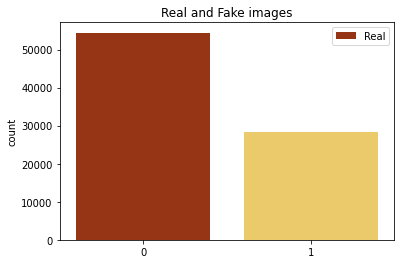

In [9]:
sns.countplot(y_label,palette='afmhot',label=['Real','Fake'])
plt.title("Real and Fake images")
plt.legend(['Real','Fake'])
plt.show()

In [10]:
print(len(X_img),len(y_label))

82621 82621


In [11]:
X = np.array(X_img)
Y = to_categorical(y_label,2)

In [12]:
X.dtype

dtype('float64')

In [13]:
X=X.reshape(-1,16,16,3)

In [14]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3, random_state=5)

In [15]:
Y_train = np.asarray(Y_train).astype('float64')
Y_val = np.asarray(Y_val).astype('float64')

In [16]:
print(len(X_train),len(Y_train))
print(len(X_val),len(Y_val))

57834 57834
24787 24787


## Building the model

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(4,4), activation='relu', input_shape=(16,16,3)))
#model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 32)        1568      
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dropout (Dropout)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 256)               1384704   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8

In [20]:
epochs = 10
batch_size = 32
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val), verbose = True)

Epoch 1/10
1808/1808 [==============================] - 30s 16ms/step - loss: 0.6386 - accuracy: 0.6597 - val_loss: 0.6394 - val_accuracy: 0.6557
Epoch 2/10
1808/1808 [==============================] - 30s 16ms/step - loss: 0.6337 - accuracy: 0.6598 - val_loss: 0.6321 - val_accuracy: 0.6557
Epoch 3/10
1808/1808 [==============================] - 31s 17ms/step - loss: 0.6291 - accuracy: 0.6596 - val_loss: 0.6296 - val_accuracy: 0.6557
Epoch 4/10
1808/1808 [==============================] - 30s 17ms/step - loss: 0.6251 - accuracy: 0.6607 - val_loss: 0.6270 - val_accuracy: 0.6567
Epoch 5/10
1808/1808 [==============================] - 29s 16ms/step - loss: 0.6213 - accuracy: 0.6610 - val_loss: 0.6230 - val_accuracy: 0.6574
Epoch 6/10
1808/1808 [==============================] - 30s 16ms/step - loss: 0.6165 - accuracy: 0.6660 - val_loss: 0.6189 - val_accuracy: 0.6635
Epoch 7/10
1808/1808 [==============================] - 30s 16ms/step - loss: 0.6080 - accuracy: 0.6695 - val_loss: 0.6157 -

## Plotting the Training and Testing accuracy

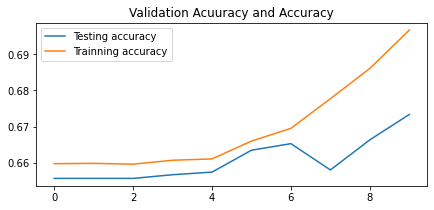

In [22]:
plt.figure(figsize=(7,3))
plt.plot(history.history['val_accuracy'],label='Testing accuracy')
plt.plot(history.history['accuracy'],label='Trainning accuracy')
plt.title("Validation Acuuracy and Accuracy")
legend = plt.legend(loc='best')
plt.show()

In [23]:
score = model.evaluate(X_val, Y_val, verbose=True)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

775/775 [==============================] - 3s 4ms/step - loss: 0.6075 - accuracy: 0.6733
Test loss: 0.6075444221496582
Test accuracy: 0.6733368039131165


## Predicting the data by using the built model by input


In [24]:
y_pred = model.predict(X_val)
print(len(y_pred))

24787


In [25]:
final_y=list()
for i in range(len(y_pred)):
  y = list(y_pred[i])
  y_dict = dict()
  #1-fake
  #0-Real
  y_dict[1]= y[0]
  y_dict[0]= y[1]
  final_y.append(max(zip(y_dict.values(),y_dict.keys())))
for i in range(len(final_y[:100])):
  if final_y[i][1] == 1:
    ans = 'Fake'
  else:
    ans='Real'
  print(f'Image{i+1} is {ans} = {final_y[i][0]*100}')

Image1 is Fake = 98.47739934921265
Image2 is Fake = 93.84135007858276
Image3 is Fake = 90.4248058795929
Image4 is Real = 69.2956805229187
Image5 is Fake = 99.93884563446045
Image6 is Fake = 53.68140935897827
Image7 is Fake = 99.4426965713501
Image8 is Real = 56.16181492805481
Image9 is Fake = 76.6780138015747
Image10 is Fake = 92.42286682128906
Image11 is Fake = 99.5020866394043
Image12 is Fake = 82.54192471504211
Image13 is Fake = 93.48463416099548
Image14 is Fake = 95.96474766731262
Image15 is Fake = 77.50133872032166
Image16 is Fake = 99.93391633033752
Image17 is Fake = 83.84495973587036
Image18 is Fake = 51.14778280258179
Image19 is Fake = 98.55729937553406
Image20 is Fake = 76.93859934806824
Image21 is Fake = 91.01186990737915
Image22 is Fake = 94.71854567527771
Image23 is Real = 54.952263832092285
Image24 is Fake = 88.58920335769653
Image25 is Fake = 57.0589542388916
Image26 is Fake = 87.88095712661743
Image27 is Real = 64.07132744789124
Image28 is Real = 58.374327421188354
Image